In [3]:
!export DATA_DIR=/home/arco/Downloads/"Master AI"/CEConvDL2
!export WANDB_DIR=/home/arco/anaconda3/envs/CEConv3.10/lib/python3.10/site-packages/
!export OUT_DIR=/home/arco/Downloads/"Master AI"/CEConv/output

!python -m experiments.color_mnist.colormnist_longtailed
!python -m experiments.color_mnist.train_longtailed --rotations 1 --planes 20 --grayscale 
!python -m experiments.color_mnist.train_longtailed --rotations 3 --planes 17 --separable

Traceback (most recent call last):
  File "/home/arco/anaconda3/envs/CEConv3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/arco/anaconda3/envs/CEConv3.10/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/arco/Downloads/Master AI/CEConvDL2/CEConv/experiments/color_mnist/colormnist_longtailed.py", line 169, in <module>
    generate_colormnist_longtailed(args.samples_per_class)
  File "/home/arco/Downloads/Master AI/CEConvDL2/CEConv/experiments/color_mnist/colormnist_longtailed.py", line 76, in generate_colormnist_longtailed
    os.makedirs(os.environ["DATA_DIR"] + "/colormnist_longtailed", exist_ok=True)
  File "/home/arco/anaconda3/envs/CEConv3.10/lib/python3.10/os.py", line 680, in __getitem__
    raise KeyError(key) from None
KeyError: 'DATA_DIR'
Traceback (most recent call last):
  File "/home/arco/anaconda3/envs/CEConv3.10/lib/python3.10/runpy.py", line 196, in _run_m

In [4]:
from experiments.color_mnist.train_longtailed import PL_model, CustomDataset
import torch
from argparse import Namespace
import matplotlib.pyplot as plt
import os

Best epoch: 249
Overall accuracy: 0.2642666697502136
Class accuracy: [0.068 0.592 0.284 0.552 0.    0.336 0.    0.048 0.604 0.    0.    0.72
 0.18  0.412 0.168 0.    0.    0.792 0.    0.    0.876 0.816 0.    0.
 0.504 0.036 0.2   0.74  0.    0.   ]
Best epoch: 899
Overall accuracy: 0.8590666651725769
Class accuracy: [0.972 0.992 0.976 0.988 0.96  0.984 0.836 0.936 0.96  0.62  0.824 0.972
 0.94  0.984 0.968 0.068 0.444 0.98  0.82  0.792 0.988 0.948 0.924 0.424
 0.936 0.88  0.936 0.952 0.872 0.896]


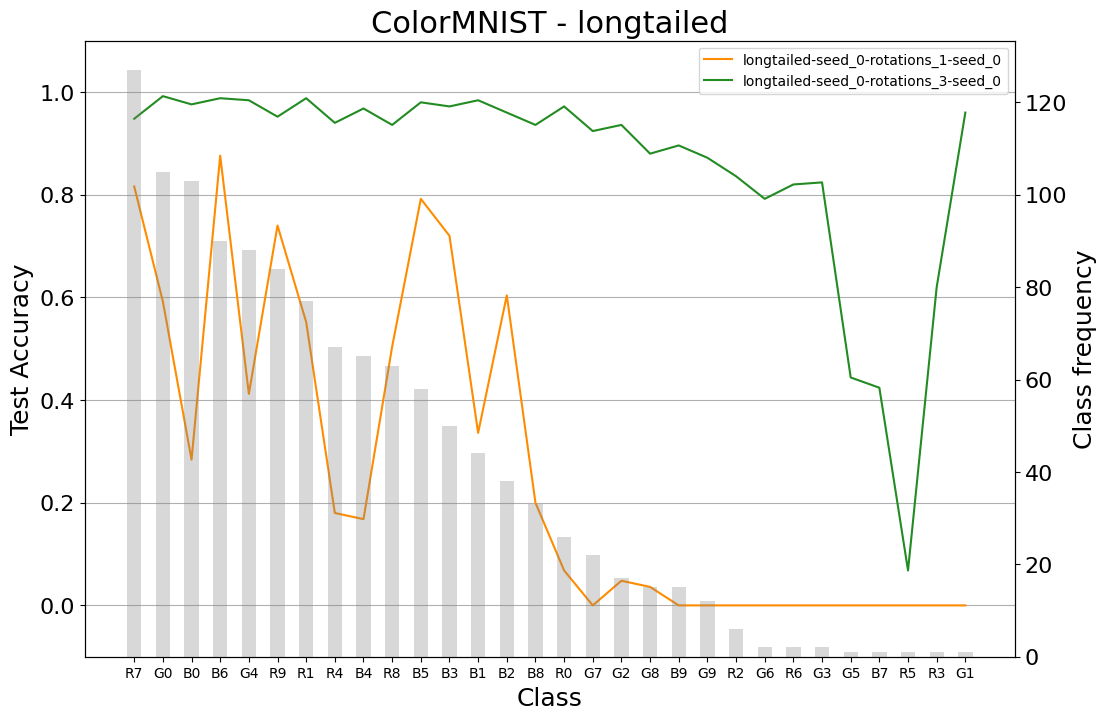

In [9]:
def plot(data_dir):
    # List of model namespaces
    models = [
        Namespace(bs=256, test_bs=256, grayscale=True, jitter=0.0, epochs=1000, seed=0, planes=20, lr=0.001, wd=1e-05, rotations=1, groupcosetpool=False, separable=False, ce_layers=7, steps_per_epoch=5, model_name='longtailed-seed_0-rotations_1-seed_0'),
        Namespace(bs=256, test_bs=256, grayscale=False, jitter=0.0, epochs=1000, seed=0, planes=17, lr=0.001, wd=1e-05, rotations=3, groupcosetpool=False, separable=True, ce_layers=7, steps_per_epoch=5, model_name='longtailed-seed_0-rotations_3-seed_0')
    ]
    
    
    # Create figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Loop over models
    for (model_args,color) in zip(models, ['darkorange', 'forestgreen']):
        model = PL_model(model_args)

        model.load_model()
        
        print("Best epoch:", model.best_epoch)
        print("Overall accuracy:", model.best_val_acc.item())
        print("Class accuracy:", model.class_acc)

        train = CustomDataset(
            torch.load(os.path.join(data_dir, "colormnist_longtailed", "train.pt")),
            jitter=model_args.jitter,
            grayscale=model_args.grayscale,
        )

        samples_per_class = torch.unique(train.tensors[1], return_counts=True)
        sort_idx = torch.argsort(samples_per_class[1], descending=True)
        samples_per_class = (samples_per_class[0][sort_idx], samples_per_class[1][sort_idx])

        labels = [j + str(i) for i in range(10) for j in ["R", "G", "B"]]
        labels = [labels[i] for i in sort_idx.numpy()]

        # Plot accuracy per class
        ax1.plot(labels, model.class_acc[sort_idx], label=model_args.model_name, color=color)

    # Plot samples per class
    ax2 = ax1.twinx()
    ax2.bar(labels, samples_per_class[1].numpy(), color="gray", alpha=0.3, width=0.5)
    ax2.set_ylabel('Class frequency', fontsize=18)

    ax1.set_xlabel('Class', fontsize=18)
    ax1.set_ylabel('Test Accuracy', fontsize=18)
    ax1.set_ylim(-0.1, 1.1)
    ax1.grid(axis='y')
    ax1.legend()

    # Set font size for x-axis ticks
    plt.xticks(rotation=45, fontsize=20)

    # Set font size for y-axis ticks
    ax1.tick_params(axis='y', labelsize=16)
    ax2.tick_params(axis='y', labelsize=16)

    plt.title('ColorMNIST - longtailed', fontsize=22)
    plt.show()

plot("/home/arco/Downloads/Master AI/CEConvDL2")
